In [1]:
""" Now that the user can read in a file this creates a model which uses the price, class and gender
Author : AstroDave
Date : 18th September 2012
Revised : 28 March 2014

"""

' Now that the user can read in a file this creates a model which uses the price, class and gender\nAuthor : AstroDave\nDate : 18th September 2012\nRevised : 28 March 2014\n\n'

In [2]:
import csv as csv
import numpy as np


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
csv_file_object = csv.reader(open('train.csv', 'r'))       # Load in the csv file
header = next(csv_file_object)                             # Skip the fist line as it is a header
data=[]                                                     # Create a variable to hold the data

for row in csv_file_object:                 # Skip through each row in the csv file
    data.append(row)                        # adding each row to the data variable
data = np.array(data)                       # Then convert from a list to an array
header, data

(['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 array([['1', '0', '3', ..., '7.25', '', 'S'],
        ['2', '1', '1', ..., '71.2833', 'C85', 'C'],
        ['3', '1', '3', ..., '7.925', '', 'S'],
        ..., 
        ['889', '0', '3', ..., '23.45', '', 'S'],
        ['890', '1', '1', ..., '30', 'C148', 'C'],
        ['891', '0', '3', ..., '7.75', '', 'Q']], 
       dtype='<U82'))

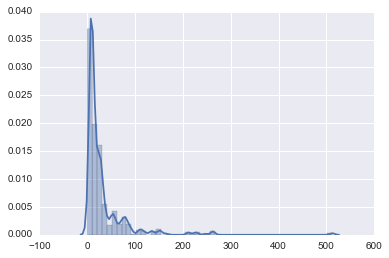

In [38]:
sns.distplot(data[0::, 9].astype(np.float))

In [40]:
# In order to analyse the price column I need to bin up that data
# here are my binning parameters, the problem we face is some of the fares are very large
# So we can either have a lot of bins with nothing in them or we can just lose some
# information by just considering that anythng over 39 is simply in the last bin.
# So we add a ceiling
fare_ceiling = 40
# then modify the data in the Fare column to = 39, if it is greater or equal to the ceiling
data[ data[0::,9].astype(np.float) >= fare_ceiling, 9 ] = fare_ceiling - 1.0


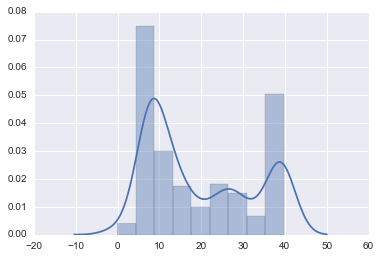

In [41]:
sns.distplot(data[0::, 9].astype(np.float))

In [56]:
fare_bracket_size = 10
number_of_price_brackets = int(fare_ceiling / fare_bracket_size)
number_of_classes = 3                             # I know there were 1st, 2nd and 3rd classes on board.
number_of_classes = len(np.unique(data[0::,2]))   # But it's better practice to calculate this from the Pclass directly:
                                                  # just take the length of an array of UNIQUE values in column index 2


In [57]:
number_of_price_brackets

4

In [58]:
# This reference matrix will show the proportion of survivors as a sorted table of
# gender, class and ticket fare.
# First initialize it with all zeros
survival_table = np.zeros([2, number_of_classes, number_of_price_brackets], float)
survival_table

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [63]:
# I can now find the stats of all the women and men on board
for i in range(number_of_classes):
    for j in range(number_of_price_brackets):

        women_only_stats = data[ (data[0::,4] == "female") \
                                 & (data[0::,2].astype(np.float) == i+1) \
                                 & (data[0:,9].astype(np.float) >= j*fare_bracket_size) \
                                 & (data[0:,9].astype(np.float) < (j+1)*fare_bracket_size), 1]

        men_only_stats = data[ (data[0::,4] != "female") \
                                 & (data[0::,2].astype(np.float) == i+1) \
                                 & (data[0:,9].astype(np.float) >= j*fare_bracket_size) \
                                 & (data[0:,9].astype(np.float) < (j+1)*fare_bracket_size), 1]

                                 #if i == 0 and j == 3:

        survival_table[0, i, j] = np.mean(women_only_stats.astype(np.float))  # Female stats
        survival_table[1, i, j] = np.mean(men_only_stats.astype(np.float))    # Male stats


/Users/knt/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [62]:
survival_table

array([[[        nan,         nan,  0.83333333,  0.97727273],
        [        nan,  0.91428571,  0.9       ,  1.        ],
        [ 0.59375   ,  0.58139535,  0.33333333,  0.125     ]],

       [[ 0.        ,         nan,  0.4       ,  0.38372093],
        [ 0.        ,  0.15873016,  0.16      ,  0.21428571],
        [ 0.11153846,  0.23684211,  0.125     ,  0.24      ]]])

In [68]:
import sys
print(1)
print(1, file=sys.stderr)

1


1


In [64]:
# Since in python if it tries to find the mean of an array with nothing in it
# (such that the denominator is 0), then it returns nan, we can convert these to 0
# by just saying where does the array not equal the array, and set these to 0.
survival_table[ survival_table != survival_table ] = 0.
survival_table

array([[[ 0.        ,  0.        ,  0.83333333,  0.97727273],
        [ 0.        ,  0.91428571,  0.9       ,  1.        ],
        [ 0.59375   ,  0.58139535,  0.33333333,  0.125     ]],

       [[ 0.        ,  0.        ,  0.4       ,  0.38372093],
        [ 0.        ,  0.15873016,  0.16      ,  0.21428571],
        [ 0.11153846,  0.23684211,  0.125     ,  0.24      ]]])

In [70]:
# Now I have my proportion of survivors, simply round them such that if <0.5
# I predict they dont surivive, and if >= 0.5 they do
survival_table[ survival_table < 0.5 ] = 0
survival_table[ survival_table >= 0.5 ] = 1
survival_table

array([[[ 0.,  0.,  1.,  1.],
        [ 0.,  1.,  1.,  1.],
        [ 1.,  1.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [71]:
# Now I have my indicator I can read in the test file and write out
# if a women then survived(1) if a man then did not survived (0)
# First read in test
test_file = open('test.csv', 'r')
test_file_object = csv.reader(test_file)
header = next(test_file_object)


In [72]:
# Also open the a new file so I can write to it. 
predictions_file = open("genderclassmodel.csv", "w")
predictions_file_object = csv.writer(predictions_file)
predictions_file_object.writerow(["PassengerId", "Survived"])


22

In [74]:
# First thing to do is bin up the price file
for row in test_file_object:
    for j in range(number_of_price_brackets):
        # If there is no fare then place the price of the ticket according to class
        try:
            row[8] = float(row[8])    # No fare recorded will come up as a string so
                                      # try to make it a float
        except:                       # If fails then just bin the fare according to the class
            bin_fare = 3 - float(row[1])
            break                     # Break from the loop and move to the next row
        if row[8] > fare_ceiling:     # Otherwise now test to see if it is higher
                                      # than the fare ceiling we set earlier
            bin_fare = number_of_price_brackets - 1
            break                     # And then break to the next row

        if row[8] >= j*fare_bracket_size\
            and row[8] < (j+1)*fare_bracket_size:     # If passed these tests then loop through
                                                      # each bin until you find the right one
                                                      # append it to the bin_fare
                                                      # and move to the next loop
            bin_fare = j
            break
        # Now I have the binned fare, passenger class, and whether female or male, we can
        # just cross ref their details with our survival table
    if row[3] == 'female':
        predictions_file_object.writerow([row[0], "%d" % int(survival_table[ 0, float(row[1]) - 1, bin_fare ])])
    else:
        predictions_file_object.writerow([row[0], "%d" % int(survival_table[ 1, float(row[1]) - 1, bin_fare])])

# Close out the files
test_file.close()
predictions_file.close()

/Users/knt/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/knt/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
